In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')


In [4]:
# Loading the train data
df_train = pd.read_csv('Train.csv')
# Looking top 10 rows
df_train.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


In [5]:
# Looking the bigger picture
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [6]:
# Checking the number of missing values in each column
df_train.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [7]:

# Loading the train data
df_test = pd.read_csv('Test.csv')

# Looking top 10 rows
df_test.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
5,459003,Male,Yes,47,Yes,Doctor,0.0,High,5.0,Cat_4
6,459005,Male,Yes,61,Yes,Doctor,5.0,Low,3.0,Cat_6
7,459008,Female,Yes,47,Yes,Artist,1.0,Average,3.0,Cat_6
8,459013,Male,Yes,50,Yes,Artist,2.0,Average,4.0,Cat_6
9,459014,Male,No,19,No,Healthcare,0.0,Low,4.0,Cat_6


In [8]:
# Looking the bigger picture
df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [9]:
# Checking the number of missing values in each column
df_test.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [10]:
# Removing all those rows that have 3 or more missing values
df_train = df_train.loc[df_train.isnull().sum(axis=1)<3]

In [11]:
# Looking random 10 rows of the data
df_train.sample(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
7414,465853,Female,Yes,33,Yes,Healthcare,NaN,Average,2.0,Cat_6,A
6359,459801,Female,No,27,Yes,Engineer,4.0,Low,2.0,Cat_6,D
8008,464894,Male,No,22,No,Healthcare,NaN,Low,5.0,Cat_4,D
7443,459598,Male,Yes,40,No,Artist,NaN,Average,2.0,Cat_4,A
3692,466839,Female,No,26,No,Homemaker,8.0,Low,2.0,Cat_6,D
535,464105,Male,Yes,65,Yes,Entertainment,1.0,Average,2.0,Cat_6,C
6961,463728,Female,Yes,30,No,Doctor,1.0,Average,6.0,Cat_6,B
3137,461810,Female,Yes,62,Yes,Homemaker,1.0,Low,1.0,Cat_2,B
7624,462591,Male,No,25,No,Doctor,4.0,Low,NaN,Cat_4,D
624,461627,Male,Yes,50,Yes,Doctor,1.0,Low,2.0,Cat_6,C


In [12]:
# Removing all those rows that have 3 or more missing values
df_test = df_test.loc[df_test.isnull().sum(axis=1)<3]

In [13]:
# Looking random 10 rows of the data
df_test.sample(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
1645,464601,Female,No,29,Yes,Healthcare,9.0,Low,2.0,Cat_6
734,461402,Female,No,29,Yes,Entertainment,1.0,Low,5.0,Cat_6
1950,465640,Male,Yes,45,Yes,Artist,5.0,Average,2.0,Cat_6
967,462218,Male,Yes,50,No,Executive,1.0,Average,5.0,Cat_4
740,461432,Female,Yes,41,Yes,Artist,1.0,Average,2.0,Cat_6
455,460453,Female,No,42,Yes,Doctor,5.0,Low,1.0,Cat_6
951,462186,Female,No,19,No,Doctor,1.0,Low,3.0,Cat_1
1904,465488,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_6
1240,463149,Male,Yes,57,Yes,Artist,2.0,Average,2.0,Cat_6
1673,464696,Female,No,40,Yes,Engineer,1.0,Low,1.0,Cat_4


In [14]:
print('The catagory count\n',df_train.Var_1.value_counts())

The catagory count
 Cat_6    5232
Cat_4    1084
Cat_3     820
Cat_2     422
Cat_7     201
Cat_1     133
Cat_5      85
Name: Var_1, dtype: int64


In [15]:
# Checking for null values
df_train.Var_1.isnull().sum()

72

In [16]:
# Filling the missing values w.r.t other attributes underlying pattern 
df_train.loc[ (pd.isnull(df_train['Var_1'])) & (df_train['Graduated'] == 'Yes'),"Var_1"] = 'Cat_6'
df_train.loc[ (pd.isnull(df_train['Var_1'])) & (df_train['Graduated'] == 'No'),"Var_1"] = 'Cat_4'
df_train.loc[ (pd.isnull(df_train["Var_1"])) & ((df_train['Profession'] == 'Lawyer') | (df_train['Profession'] == 'Artist')),"Var_1"] = 'Cat_6'
df_train.loc[ (pd.isnull(df_train["Var_1"])) & (df_train['Age'] > 40),"Var_1"] = 'Cat_6'

In [17]:
# Checking for null values
df_test.Var_1.isnull().sum()

29

In [18]:
numerical_columns_train=['ID','Age','Work_Experience','Family_Size' ]
categorical_columns_train=['Gender','Ever_Married','Graduated','Profession','Spending_Score','Var_1','Segmentation']

In [19]:
numerical_columns_test=['ID','Age','Work_Experience','Family_Size' ]
categorical_columns_test=['Gender','Ever_Married','Graduated','Profession','Spending_Score','Var_1']

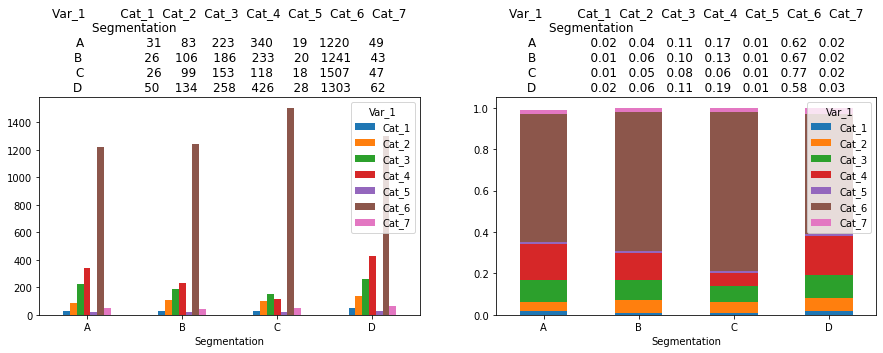

In [20]:
# Counting Var_1 in each segment
ax1 = df_train.groupby(["Segmentation"])["Var_1"].value_counts().unstack().round(3)

# Percentage of category of Var_1 in each segment
ax2 = df_train.pivot_table(columns='Var_1',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()



In [21]:
# Checking the count of missing values
df_train.Gender.isnull().sum()

0

In [22]:
# Checking the count of missing values
df_test.Gender.isnull().sum()

0

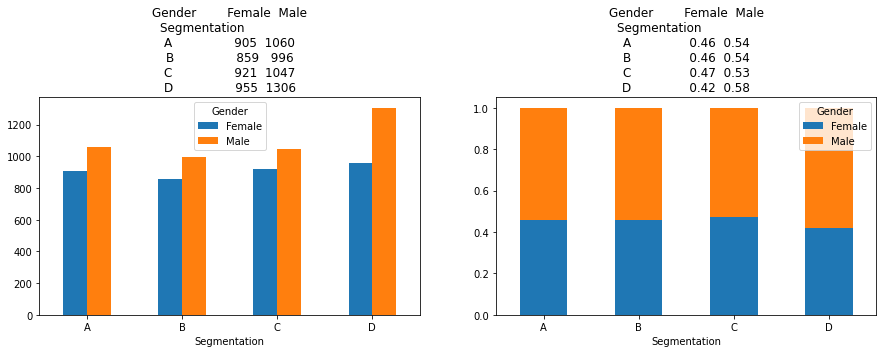

In [23]:
# Counting male-female in each segment
ax1 = df_train.groupby(["Segmentation"])["Gender"].value_counts().unstack().round(3)

# Percentage of male-female in each segment
ax2 = df_train.pivot_table(columns='Gender',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()


In [24]:
print('The count grouped by marital status\n',df_train.Ever_Married.value_counts())

The count grouped by marital status
 Yes    4635
No     3280
Name: Ever_Married, dtype: int64


In [25]:

# Checking the count of missing values
df_train.Gender.isnull().sum()


0

In [26]:


# Checking the count of missing values
df_test.Gender.isnull().sum()



0

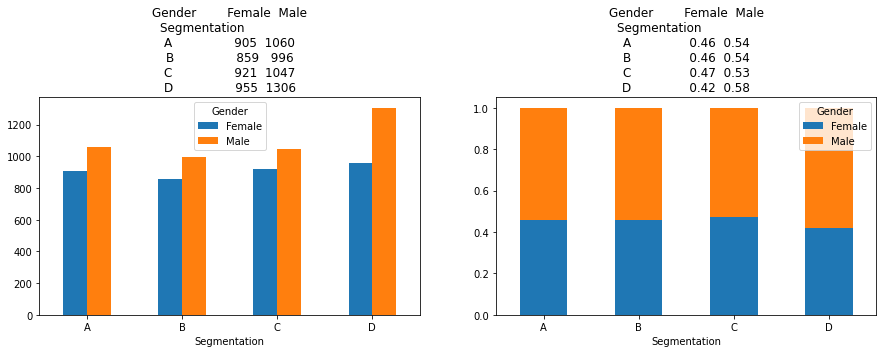

In [27]:


# Counting male-female in each segment
ax1 = df_train.groupby(["Segmentation"])["Gender"].value_counts().unstack().round(3)

# Percentage of male-female in each segment
ax2 = df_train.pivot_table(columns='Gender',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()



In [28]:
print('The count grouped by marital status\n',df_train.Ever_Married.value_counts())


The count grouped by marital status
 Yes    4635
No     3280
Name: Ever_Married, dtype: int64


In [29]:

# Checking the count of missing values
df_train.Ever_Married.isnull().sum()



134

In [31]:

# Filling the missing values w.r.t other attributes underlying pattern
df_train.loc[ (pd.isnull(df_train["Ever_Married"])) & ((df_train['Spending_Score'] == 'Average') | (df_train['Spending_Score'] == 'High')),"Ever_Married"] = 'Yes'
df_train.loc[ (pd.isnull(df_train["Ever_Married"])) & (df_train['Spending_Score'] == 'Low'),"Ever_Married"] = 'No'
df_train.loc[ (pd.isnull(df_train["Ever_Married"])) & (df_train['Age'] > 40),"Ever_Married"] = 'Yes'
df_train.loc[ (pd.isnull(df_train["Ever_Married"])) & (df_train['Profession'] == 'Healthcare'),"Ever_Married"] = 'No'


In [32]:


# Checking the count of missing values
df_test.Ever_Married.isnull().sum()


48

In [33]:

# Filling the missing values w.r.t other attributes underlying pattern
df_test.loc[ (pd.isnull(df_test["Ever_Married"])) & ((df_test['Spending_Score'] == 'Average') | (df_test['Spending_Score'] == 'High')),"Ever_Married"] = 'Yes'
df_test.loc[ (pd.isnull(df_test["Ever_Married"])) & (df_test['Spending_Score'] == 'Low'),"Ever_Married"] = 'No'
df_test.loc[ (pd.isnull(df_test["Ever_Married"])) & (df_test['Age'] > 40),"Ever_Married"] = 'Yes'
df_test.loc[ (pd.isnull(df_test["Ever_Married"])) & (df_test['Profession'] == 'Healthcare'),"Ever_Married"] = 'No'



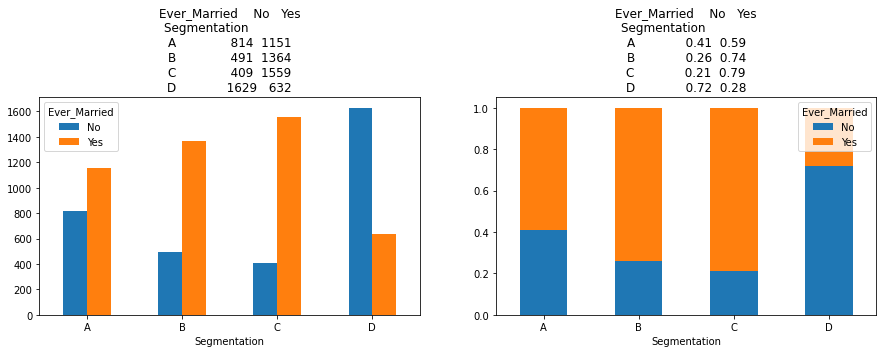

In [34]:

# Counting married and non-married in each segment
ax1 = df_train.groupby(["Segmentation"])["Ever_Married"].value_counts().unstack().round(3)

# Percentage of married and non-married in each segment
ax2 = df_train.pivot_table(columns='Ever_Married',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()


In [35]:
df_train.Age.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    8049.000000
mean       43.458442
std        16.704328
min        18.000000
25%        30.000000
50%        40.000000
75%        53.000000
90%        69.000000
95%        77.000000
99%        87.000000
max        89.000000
Name: Age, dtype: float64

In [36]:


# Checking the count of missing values
df_train.Age.isnull().sum()


0

In [37]:

# Checking the count of missing values
df_test.Age.isnull().sum()



0

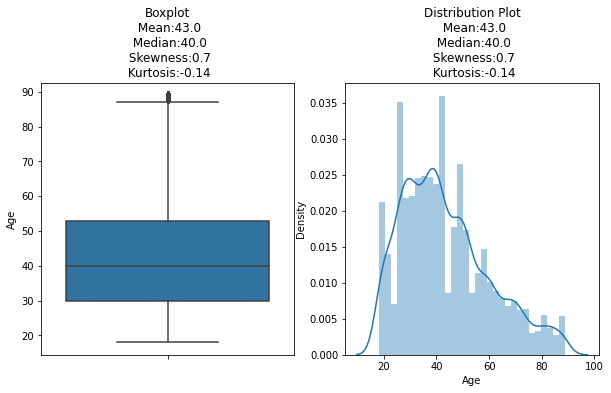

In [38]:


# Looking the distribution of column Age
plt.figure(figsize=(10,5))

skewness = round(df_train.Age.skew(),2)
kurtosis = round(df_train.Age.kurtosis(),2)
mean = round(np.mean(df_train.Age),0)
median = np.median(df_train.Age)

plt.subplot(1,2,1)
sns.boxplot(y=df_train.Age)
plt.title('Boxplot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.subplot(1,2,2)
sns.distplot(df_train.Age)
plt.title('Distribution Plot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.show()


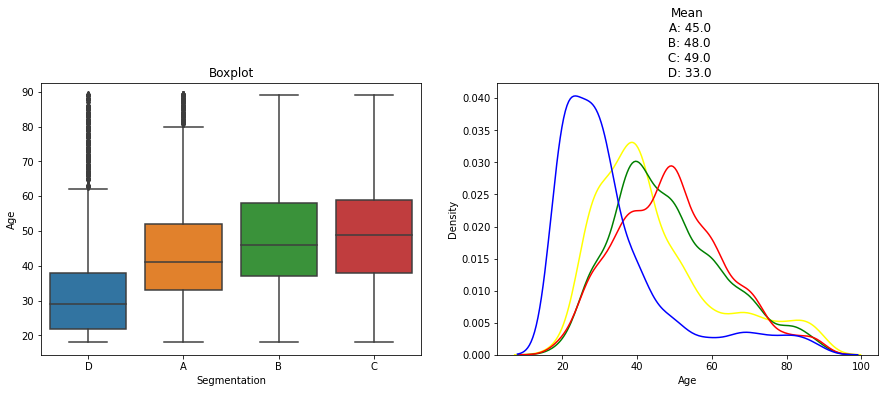

In [39]:

# Looking the distribution of column Age w.r.t to each segment
a = df_train[df_train.Segmentation =='A']["Age"]
b = df_train[df_train.Segmentation =='B']["Age"]
c = df_train[df_train.Segmentation =='C']["Age"]
d = df_train[df_train.Segmentation =='D']["Age"]

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data = df_train, x = "Segmentation", y="Age")
plt.title('Boxplot')

plt.subplot(1,2,2)
sns.kdeplot(a,shade= False, label = 'A', color = 'yellow')
sns.kdeplot(b,shade= False, label = 'B', color = 'green')
sns.kdeplot(c,shade= False, label = 'C', color = 'red')
sns.kdeplot(d,shade= False, label = 'D', color = 'blue')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title("Mean\n A: {}\n B: {}\n C: {}\n D: {}".format(round(a.mean(),0),round(b.mean(),0),round(c.mean(),0),round(d.mean(),0)))

plt.show()



In [41]:


# Converting the datatype from float to int
df_train['Age'] = df_train['Age'].astype(int)



In [42]:

df_train.Age.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])



count    8049.000000
mean       43.458442
std        16.704328
min        18.000000
25%        30.000000
50%        40.000000
75%        53.000000
90%        69.000000
95%        77.000000
99%        87.000000
max        89.000000
Name: Age, dtype: float64

In [43]:
# Divide people in the 4 age group
df_train['Age_Bin'] = pd.cut(df_train.Age,bins=[17,30,45,60,90],labels=['17-30','31-45','46-60','60+'])


In [44]:

# Divide people in the 4 age group
df_test['Age_Bin'] = pd.cut(df_test.Age,bins=[17,30,45,60,90],labels=['17-30','31-45','46-60','60+'])



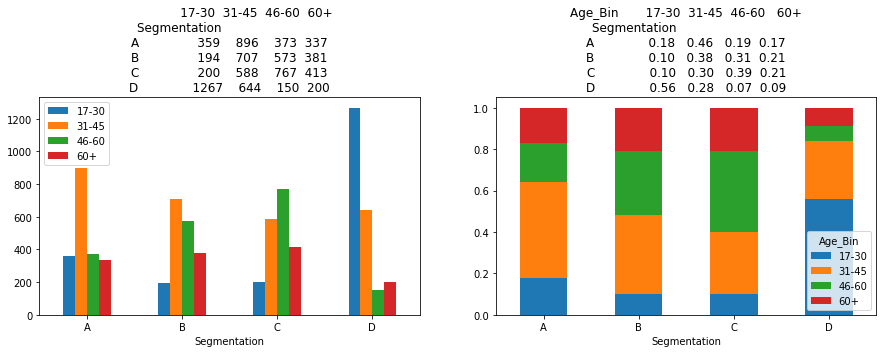

In [45]:


# Counting different age group in each segment
ax1 = df_train.groupby(["Segmentation"])["Age_Bin"].value_counts().unstack().round(3)

# Percentage of age bins in each segment
ax2 = df_train.pivot_table(columns='Age_Bin',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()


In [46]:
print('Count of each graduate and non-graduate\n',df_train.Graduated.value_counts())


Count of each graduate and non-graduate
 Yes    4965
No     3012
Name: Graduated, dtype: int64


In [47]:

# Checking the count of missing values
df_train.Graduated.isnull().sum()


72

In [48]:

# Filling the missing values w.r.t other attributes underlying pattern
df_train.loc[ (pd.isnull(df_train["Graduated"])) & (df_train['Spending_Score'] == 'Average'),"Graduated"] = 'Yes'
df_train.loc[ (pd.isnull(df_train["Graduated"])) & (df_train['Profession'] == 'Artist'),"Graduated"] = 'Yes'
df_train.loc[ (pd.isnull(df_train["Graduated"])) & (df_train['Age'] > 49),"Graduated"] = 'Yes'
df_train.loc[ (pd.isnull(df_train["Graduated"])) & (df_train['Var_1'] == 'Cat_4'),"Graduated"] = 'No'
df_train.loc[ (pd.isnull(df_train["Graduated"])) & (df_train['Ever_Married'] == 'Yes'),"Graduated"] = 'Yes'

# Replacing remaining NaN with previous values
df_train['Graduated'] = df_train['Graduated'].fillna(method='pad')


In [49]:
# Checking the count of missing values
df_test.Graduated.isnull().sum()


23

In [50]:
# Filling the missing values w.r.t other attributes underlying pattern
df_test.loc[ (pd.isnull(df_test["Graduated"])) & (df_test['Spending_Score'] == 'Average'),"Graduated"] = 'Yes'
df_test.loc[ (pd.isnull(df_test["Graduated"])) & (df_test['Profession'] == 'Artist'),"Graduated"] = 'Yes'
df_test.loc[ (pd.isnull(df_test["Graduated"])) & (df_test['Age'] > 49),"Graduated"] = 'Yes'
df_test.loc[ (pd.isnull(df_test["Graduated"])) & (df_test['Var_1'] == 'Cat_4'),"Graduated"] = 'No'
df_test.loc[ (pd.isnull(df_test["Graduated"])) & (df_test['Ever_Married'] == 'Yes'),"Graduated"] = 'Yes'

# Replacing remaining NaN with previous values
df_test['Graduated'] = df_test['Graduated'].fillna(method='pad')


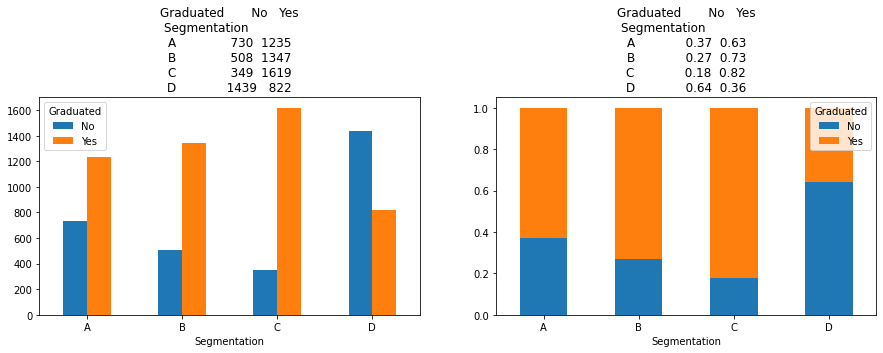

In [51]:
# Counting graduate and non-graduate in each segment
ax1 = df_train.groupby(["Segmentation"])["Graduated"].value_counts().unstack().round(3)

# Percentage of graduate and non-graduate in each segment
ax2 = df_train.pivot_table(columns='Graduated',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()


In [52]:
print('The count grouped by profession\n',df_train.Profession.value_counts())

The count grouped by profession
 Artist           2515
Healthcare       1331
Entertainment     949
Engineer          699
Doctor            688
Lawyer            619
Executive         598
Marketing         291
Homemaker         246
Name: Profession, dtype: int64


In [53]:
# Checking the count of missing values
df_train.Profession.isnull().sum()

113

In [54]:
# Filling the missing values w.r.t other attributes underlying pattern
df_train.loc[ (pd.isnull(df_train["Profession"])) & (df_train['Work_Experience'] > 8),"Profession"] = 'Homemaker'
df_train.loc[ (pd.isnull(df_train["Profession"])) & (df_train['Age'] > 70),"Profession"] = 'Lawyer'
df_train.loc[ (pd.isnull(df_train["Profession"])) & (df_train['Family_Size'] < 3),"Profession"] = 'Lawyer'
df_train.loc[ (pd.isnull(df_train["Profession"])) & (df_train['Spending_Score'] == 'Average'),"Profession"] = 'Artist'
df_train.loc[ (pd.isnull(df_train["Profession"])) & (df_train['Graduated'] == 'Yes'),"Profession"] = 'Artist'
df_train.loc[ (pd.isnull(df_train["Profession"])) & (df_train['Ever_Married'] == 'Yes'),"Profession"] = 'Artist'
df_train.loc[ (pd.isnull(df_train["Profession"])) & (df_train['Ever_Married'] == 'No'),"Profession"] = 'Healthcare'
df_train.loc[ (pd.isnull(df_train["Profession"])) & (df_train['Spending_Score'] == 'High'),"Profession"] = 'Executives'


In [55]:
# Checking the count of missing values
df_test.Profession.isnull().sum()

35

In [56]:
# Filling the missing values w.r.t other attributes underlying pattern
df_test.loc[ (pd.isnull(df_test["Profession"])) & (df_test['Work_Experience'] > 8),"Profession"] = 'Homemaker'
df_test.loc[ (pd.isnull(df_test["Profession"])) & (df_test['Age'] > 70),"Profession"] = 'Lawyer'
df_test.loc[ (pd.isnull(df_test["Profession"])) & (df_test['Family_Size'] < 3),"Profession"] = 'Lawyer'
df_test.loc[ (pd.isnull(df_test["Profession"])) & (df_test['Spending_Score'] == 'Average'),"Profession"] = 'Artist'
df_test.loc[ (pd.isnull(df_test["Profession"])) & (df_test['Graduated'] == 'Yes'),"Profession"] = 'Artist'
df_test.loc[ (pd.isnull(df_test["Profession"])) & (df_test['Ever_Married'] == 'Yes'),"Profession"] = 'Artist'
df_test.loc[ (pd.isnull(df_test["Profession"])) & (df_test['Ever_Married'] == 'No'),"Profession"] = 'Healthcare'
df_test.loc[ (pd.isnull(df_test["Profession"])) & (df_test['Spending_Score'] == 'High'),"Profession"] = 'Executives'


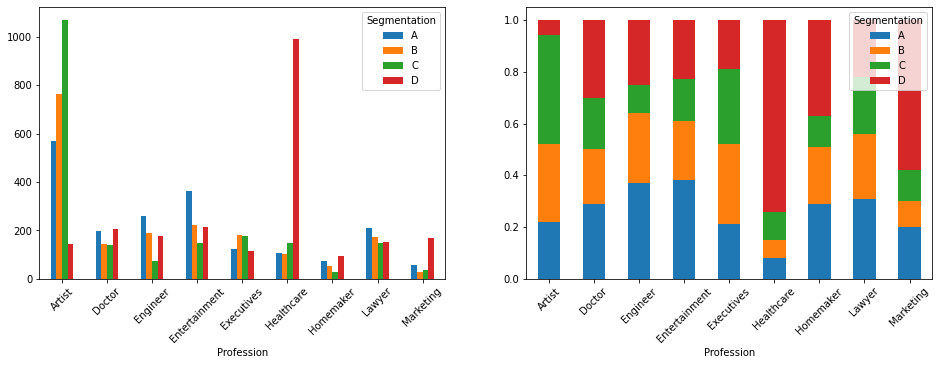

In [57]:
# Count of segments in each profession
ax1 = df_train.groupby(["Profession"])["Segmentation"].value_counts().unstack().round(3)

# Percentage of segments in each profession
ax2 = df_train.pivot_table(columns='Segmentation',index='Profession',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (16,5))
label = ['Artist','Doctor','Engineer','Entertainment','Executives','Healthcare','Homemaker','Lawyer','Marketing']
ax[0].set_xticklabels(labels = label,rotation = 45)

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (16,5))
ax[1].set_xticklabels(labels = label,rotation = 45)

plt.show()

In [ ]:
df_train.Work_Experience.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

In [58]:

# Checking the count of missing values
df_train.Work_Experience.isnull().sum()

813

In [59]:
# Replacing NaN with previous values
df_train['Work_Experience'] = df_train['Work_Experience'].fillna(method='pad')


In [60]:
# Checking the count of missing values
df_test.Work_Experience.isnull().sum()


264

In [ ]:
# Replacing NaN with previous values
df_test['Work_Experience'] = df_test['Work_Experience'].fillna(method='pad')


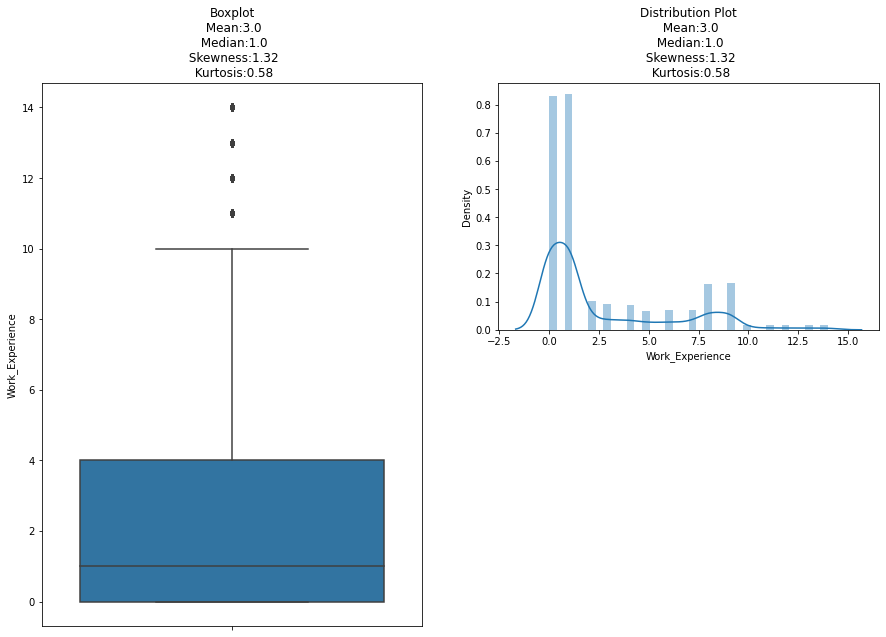

In [61]:
# Looking the distribution of column Work Experience
plt.figure(figsize=(15,10))

skewness = round(df_train.Work_Experience.skew(),2)
kurtosis = round(df_train.Work_Experience.kurtosis(),2)
mean = round(np.mean(df_train.Work_Experience),0)
median = np.median(df_train.Work_Experience)

plt.subplot(1,2,1)
sns.boxplot(y=df_train.Work_Experience)
plt.title('Boxplot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.subplot(2,2,2)
sns.distplot(df_train.Work_Experience)
plt.title('Distribution Plot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.show()

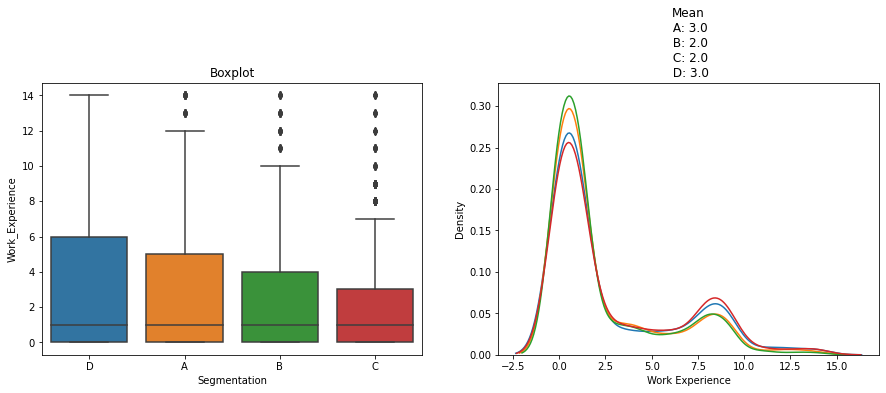

In [63]:
#Looking the distribution of column Work_Experience w.r.t to each segment
a = df_train[df_train.Segmentation =='A']["Work_Experience"]
b = df_train[df_train.Segmentation =='B']["Work_Experience"]
c = df_train[df_train.Segmentation =='C']["Work_Experience"]
d = df_train[df_train.Segmentation =='D']["Work_Experience"]

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data = df_train, x = "Segmentation", y="Work_Experience")
plt.title('Boxplot')

plt.subplot(1,2,2)
sns.kdeplot(a,shade= False, label = 'A')
sns.kdeplot(b,shade= False, label = 'B')
sns.kdeplot(c,shade= False, label = 'C')
sns.kdeplot(d,shade= False, label = 'D')
plt.xlabel('Work Experience')
plt.ylabel('Density')
plt.title("Mean\n A: {}\n B: {}\n C: {}\n D: {}".format(round(a.mean(),0),round(b.mean(),0),round(c.mean(),0),round(d.mean(),0)))

plt.show()

In [64]:

# Dividing the people into 3 category of work experience 
df_train['Work_Exp_Category'] = pd.cut(df_train.Work_Experience,bins=[-1,1,7,15],labels=['Low Experience','Medium Experience','High Experience'])


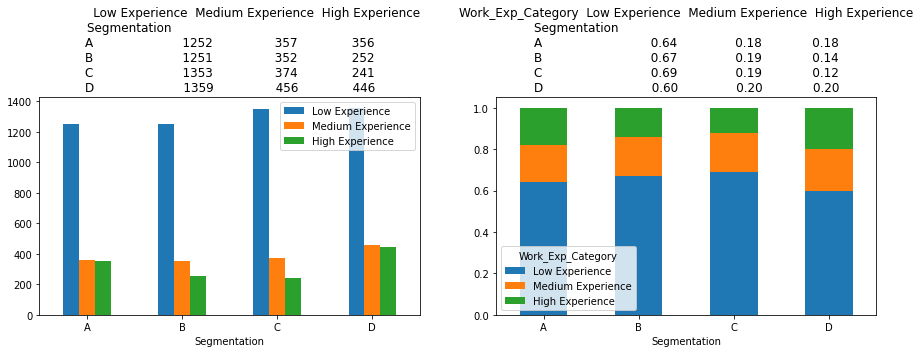

In [65]:
# Counting different category of work experience in each segment
ax1 = df_train.groupby(["Segmentation"])["Work_Exp_Category"].value_counts().unstack().round(3)

# Percentage of work experience in each segment
ax2 = df_train.pivot_table(columns='Work_Exp_Category',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()

In [66]:
# Dividing the people into 3 category of work experience 
df_test['Work_Exp_Category'] = pd.cut(df_train.Work_Experience,bins=[-1,1,7,15],labels=['Low Experience','Medium Experience','High Experience'])


In [67]:
print('The count grouped by spending score\n',df_train.Spending_Score.value_counts())

The count grouped by spending score
 Low        4869
Average    1970
High       1210
Name: Spending_Score, dtype: int64


In [68]:
# Checking the count of missing values
df_train.Spending_Score.isnull().sum()

0

In [69]:
# Checking the count of missing values
df_test.Spending_Score.isnull().sum()

0

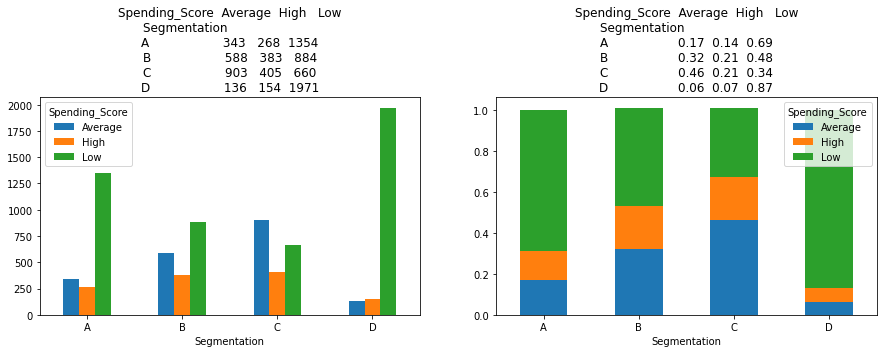

In [70]:
# Counting different category of spending score in each segment
ax1 = df_train.groupby(["Segmentation"])["Spending_Score"].value_counts().unstack().round(3)

# Percentage of spending score in each segment
ax2 = df_train.pivot_table(columns='Spending_Score',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()

In [71]:
df_train.Family_Size.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    7729.000000
mean        2.850175
std         1.531523
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
90%         5.000000
95%         6.000000
99%         8.000000
max         9.000000
Name: Family_Size, dtype: float64

In [72]:
# Checking the count of missing values
df_train.Family_Size.isnull().sum()


320

In [73]:
# Filling the missing values w.r.t other attributes underlying pattern
df_train.loc[ (pd.isnull(df_train["Family_Size"])) & (df_train['Ever_Married'] == 'Yes'),"Family_Size"] = 2.0
df_train.loc[ (pd.isnull(df_train["Family_Size"])) & (df_train['Var_1'] == 'Cat_6'),"Family_Size"] = 2.0
df_train.loc[ (pd.isnull(df_train["Family_Size"])) & (df_train['Graduated'] == 'Yes'),"Family_Size"] = 2.0

# Fill remaining NaN with previous values
df_train['Family_Size'] = df_train['Family_Size'].fillna(method='pad')


In [74]:
# Checking the count of missing values
df_test.Family_Size.isnull().sum()


109

In [75]:
# Filling the missing values w.r.t other attributes underlying pattern
df_test.loc[ (pd.isnull(df_test["Family_Size"])) & (df_test['Ever_Married'] == 'Yes'),"Family_Size"] = 2.0
df_test.loc[ (pd.isnull(df_test["Family_Size"])) & (df_test['Var_1'] == 'Cat_6'),"Family_Size"] = 2.0
df_test.loc[ (pd.isnull(df_test["Family_Size"])) & (df_test['Graduated'] == 'Yes'),"Family_Size"] = 2.0

# Fill remaining NaN with previous values
df_test['Family_Size'] = df_test['Family_Size'].fillna(method='pad')


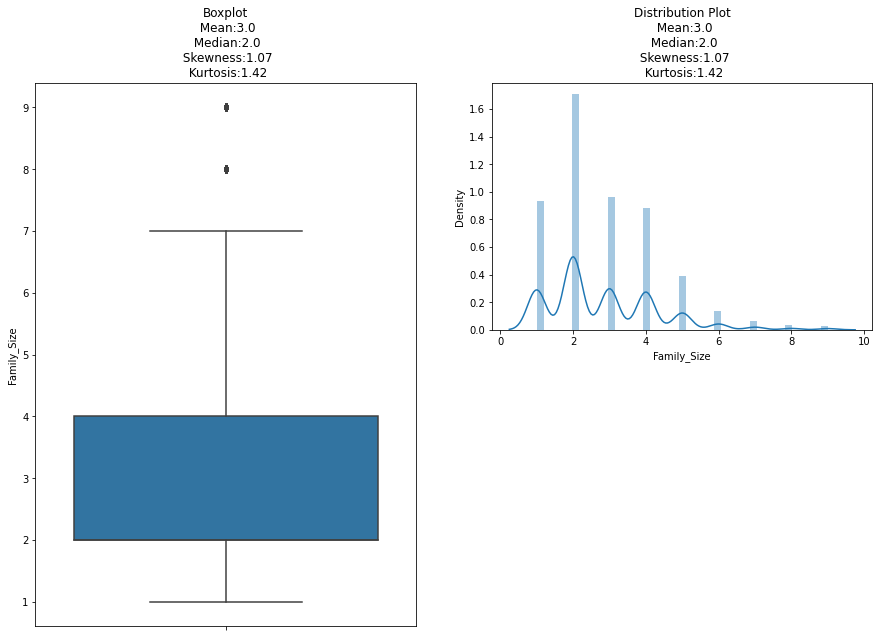

In [76]:
# Looking the distribution of column Work Experience
plt.figure(figsize=(15,10))

skewness = round(df_train.Family_Size.skew(),2)
kurtosis = round(df_train.Family_Size.kurtosis(),2)
mean = round(np.mean(df_train.Family_Size),0)
median = np.median(df_train.Family_Size)

plt.subplot(1,2,1)
sns.boxplot(y=df_train.Family_Size)
plt.title('Boxplot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.subplot(2,2,2)
sns.distplot(df_train.Family_Size)
plt.title('Distribution Plot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.show()

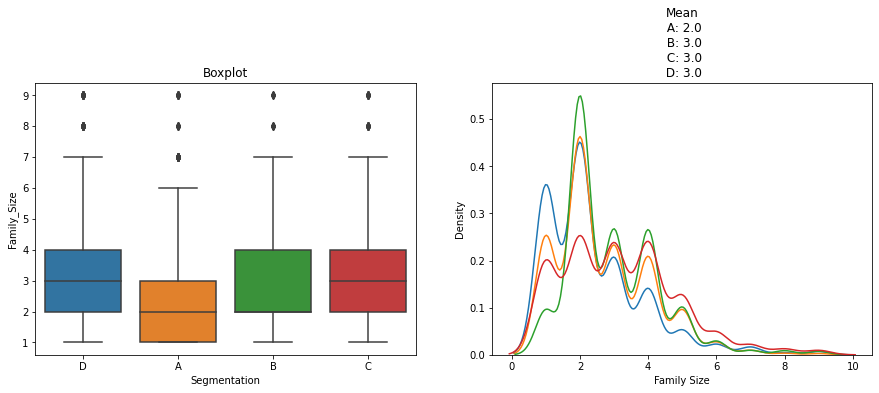

In [77]:
# Looking the distribution of column Family Size w.r.t to each segment
a = df_train[df_train.Segmentation =='A']["Family_Size"]
b = df_train[df_train.Segmentation =='B']["Family_Size"]
c = df_train[df_train.Segmentation =='C']["Family_Size"]
d = df_train[df_train.Segmentation =='D']["Family_Size"]

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data = df_train, x = "Segmentation", y="Family_Size")
plt.title('Boxplot')

plt.subplot(1,2,2)
sns.kdeplot(a,shade= False, label = 'A')
sns.kdeplot(b,shade= False, label = 'B')
sns.kdeplot(c,shade= False, label = 'C')
sns.kdeplot(d,shade= False, label = 'D')
plt.xlabel('Family Size')
plt.ylabel('Density')
plt.title("Mean\n A: {}\n B: {}\n C: {}\n D: {}".format(round(a.mean(),0),round(b.mean(),0),round(c.mean(),0),round(d.mean(),0)))

plt.show()

In [78]:
# Changing the data type
df_train['Family_Size'] = df_train['Family_Size'].astype(int)


In [79]:
df_train.Family_Size.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])


count    8049.000000
mean        2.820475
std         1.513836
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
90%         5.000000
95%         6.000000
99%         8.000000
max         9.000000
Name: Family_Size, dtype: float64

In [80]:
# Divide family size into 3 category
df_train['Family_Size_Category'] = pd.cut(df_train.Family_Size,bins=[0,4,6,10],labels=['Small Family','Big Family','Joint Family'])


In [81]:
# Changing the data type
df_test['Family_Size'] = df_test['Family_Size'].astype(int)


In [82]:
df_test.Family_Size.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    2621.000000
mean        2.804273
std         1.541115
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
90%         5.000000
95%         6.000000
99%         8.000000
max         9.000000
Name: Family_Size, dtype: float64

In [83]:
# Divide family size into 3 category
df_test['Family_Size_Category'] = pd.cut(df_test.Family_Size,bins=[0,4,6,10],labels=['Small Family','Big Family','Joint Family'])


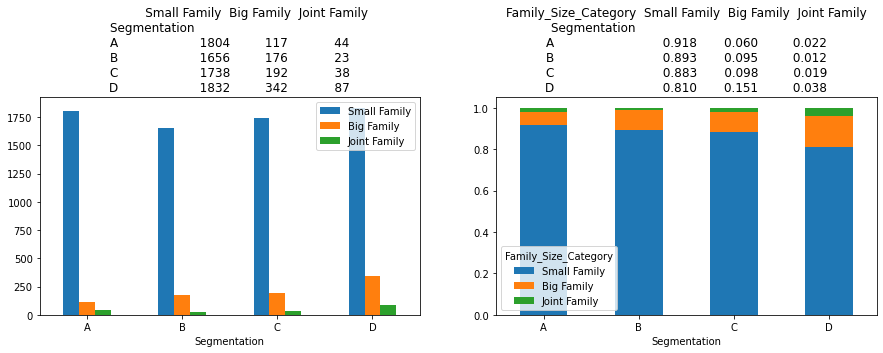

In [84]:
# Counting different category of family size in each segment
ax1 = df_train.groupby(["Segmentation"])["Family_Size_Category"].value_counts().unstack().round(3)

# Percentage of family size in each segment
ax2 = df_train.pivot_table(columns='Family_Size_Category',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(3)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()

In [86]:
print('Count of each category of segmentation\n',df_train.Segmentation.value_counts())

Count of each category of segmentation
 D    2261
C    1968
A    1965
B    1855
Name: Segmentation, dtype: int64


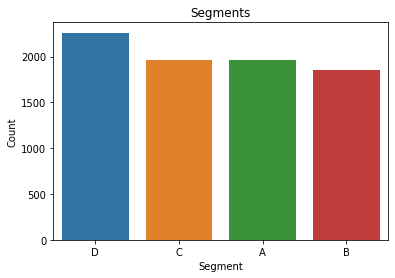

In [87]:
segments = df_train.loc[:,"Segmentation"].value_counts()
plt.xlabel("Segment")
plt.ylabel('Count')
sns.barplot(segments.index , segments.values).set_title('Segments')
plt.show()


In [88]:
df_train.reset_index(drop=True, inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8049 entries, 0 to 8048
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ID                    8049 non-null   int64   
 1   Gender                8049 non-null   object  
 2   Ever_Married          8049 non-null   object  
 3   Age                   8049 non-null   int64   
 4   Graduated             8049 non-null   object  
 5   Profession            8049 non-null   object  
 6   Work_Experience       8049 non-null   float64 
 7   Spending_Score        8049 non-null   object  
 8   Family_Size           8049 non-null   int64   
 9   Var_1                 8049 non-null   object  
 10  Segmentation          8049 non-null   object  
 11  Age_Bin               8049 non-null   category
 12  Work_Exp_Category     8049 non-null   category
 13  Family_Size_Category  8049 non-null   category
dtypes: category(3), float64(1), int64(3), object(7)
memory u

In [89]:
# number of unique ids
df_train.ID.nunique()

8049

In [90]:
# number of unique ids in Test Set
df_test.ID.nunique()

2621

In [91]:
df_train.describe(include='all')

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_Bin,Work_Exp_Category,Family_Size_Category
count,8049.000000,8049,8049,8049.000000,8049,8049,8049.000000,8049,8049.000000,8049,8049,8049,8049,8049
unique,NaN,2,2,NaN,2,9,NaN,3,NaN,7,4,4,3,3
top,NaN,Male,Yes,NaN,Yes,Artist,NaN,Low,NaN,Cat_6,D,31-45,Low Experience,Small Family
freq,NaN,4409,4706,NaN,5023,2544,NaN,4869,NaN,5271,2261,2835,5215,7030
mean,463481.549012,NaN,NaN,43.458442,NaN,NaN,2.617965,NaN,2.820475,NaN,NaN,NaN,NaN,NaN
std,2595.221174,NaN,NaN,16.704328,NaN,NaN,3.394392,NaN,1.513836,NaN,NaN,NaN,NaN,NaN
min,458982.000000,NaN,NaN,18.000000,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,461244.000000,NaN,NaN,30.000000,NaN,NaN,0.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN
50%,463476.000000,NaN,NaN,40.000000,NaN,NaN,1.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN
75%,465746.000000,NaN,NaN,53.000000,NaN,NaN,4.000000,NaN,4.000000,NaN,NaN,NaN,NaN,NaN


In [92]:
df_train = df_train[['ID','Gender', 'Ever_Married', 'Age', 'Age_Bin', 'Graduated', 'Profession', 'Work_Experience', 'Work_Exp_Category',
         'Spending_Score', 'Family_Size', 'Family_Size_Category','Var_1', 'Segmentation']]
df_train.head(10)

,ID,Gender,Ever_Married,Age,Age_Bin,Graduated,Profession,Work_Experience,Work_Exp_Category,Spending_Score,Family_Size,Family_Size_Category,Var_1,Segmentation
0,462809,Male,No,22,17-30,No,Healthcare,1.0,Low Experience,Low,4,Small Family,Cat_4,D
1,462643,Female,Yes,38,31-45,Yes,Engineer,1.0,Low Experience,Average,3,Small Family,Cat_4,A
2,466315,Female,Yes,67,60+,Yes,Engineer,1.0,Low Experience,Low,1,Small Family,Cat_6,B
3,461735,Male,Yes,67,60+,Yes,Lawyer,0.0,Low Experience,High,2,Small Family,Cat_6,B
4,462669,Female,Yes,40,31-45,Yes,Entertainment,0.0,Low Experience,High,6,Big Family,Cat_6,A
5,461319,Male,Yes,56,46-60,No,Artist,0.0,Low Experience,Average,2,Small Family,Cat_6,C
6,460156,Male,No,32,31-45,Yes,Healthcare,1.0,Low Experience,Low,3,Small Family,Cat_6,C
7,464347,Female,No,33,31-45,Yes,Healthcare,1.0,Low Experience,Low,3,Small Family,Cat_6,D
8,465015,Female,Yes,61,60+,Yes,Engineer,0.0,Low Experience,Low,3,Small Family,Cat_7,D
9,465176,Female,Yes,55,46-60,Yes,Artist,1.0,Low Experience,Average,4,Small Family,Cat_6,C


In [93]:
df1 = df_train.copy()
df1.head()

,ID,Gender,Ever_Married,Age,Age_Bin,Graduated,Profession,Work_Experience,Work_Exp_Category,Spending_Score,Family_Size,Family_Size_Category,Var_1,Segmentation
0,462809,Male,No,22,17-30,No,Healthcare,1.0,Low Experience,Low,4,Small Family,Cat_4,D
1,462643,Female,Yes,38,31-45,Yes,Engineer,1.0,Low Experience,Average,3,Small Family,Cat_4,A
2,466315,Female,Yes,67,60+,Yes,Engineer,1.0,Low Experience,Low,1,Small Family,Cat_6,B
3,461735,Male,Yes,67,60+,Yes,Lawyer,0.0,Low Experience,High,2,Small Family,Cat_6,B
4,462669,Female,Yes,40,31-45,Yes,Entertainment,0.0,Low Experience,High,6,Big Family,Cat_6,A


In [94]:
# Separating dependent-independent variables
X = df1.drop('Segmentation',axis=1)
y = df1['Segmentation']

In [ ]:
# import the train-test split
from sklearn.model_selection import train_test_split

# divide into train and test sets
df1_trainX, df1_testX, df1_trainY, df1_testY = train_test_split(X,y, train_size = 0.7, random_state = 101, stratify=y)


In [ ]:
# converting binary variables to numeric
df1_trainX['Gender'] = df1_trainX['Gender'].replace(('Male','Female'),(1,0))
df1_trainX['Ever_Married'] = df1_trainX['Ever_Married'].replace(('Yes','No'),(1,0))
df1_trainX['Graduated'] = df1_trainX['Graduated'].replace(('Yes','No'),(1,0))
df1_trainX['Spending_Score'] = df1_trainX['Spending_Score'].replace(('High','Average','Low'),(3,2,1))

# converting nominal variables into dummy variables
pf = pd.get_dummies(df1_trainX.Profession,prefix='Profession')
df1_trainX = pd.concat([df1_trainX,pf],axis=1)

vr = pd.get_dummies(df1_trainX.Var_1,prefix='Var_1')
df1_trainX = pd.concat([df1_trainX,vr],axis=1)